# Introducción 

En este documento intento hacer un pequeño análisis preliminar del dataset para el data lover challenge. La idea es hacer un análisis de los datos que contiene el dataset, y para qué pueden servir, ya que no incluyen ningún otro tipo de información adjunta. A lo largo de las distintas operaciones iré comentando lo que me parece relevante. Al final del documentó incluiré un resumen con mis conclusiones e ideas. 

# Análisis preliminar

En un primer análisis me gusta echar un vistazo a los datos que tengo y sacar un par de muestras de cada archivo para hacerme una idea de lo que tengo entre manos: variables, tipos de variables, relaciones entre ellas...

In [42]:
import pandas as pd                #Procesado de datos
import matplotlib.pyplot as plt    #Visualización, plots...
import seaborn as sns               #Visualización
import numpy as np                 #Algebra lineal
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

#import time
%matplotlib inline                 

In [6]:
data1 = pd.read_csv('1.csv')     #Carga del primer archivo como dataframe de pandas
data2 = pd.read_csv('2.csv')     
data3 = pd.read_csv('3.csv')     
data4 = pd.read_csv('4.csv')     
data5 = pd.read_csv('5.csv')     
data6 = pd.read_csv('6.csv')     
data7 = pd.read_csv('7.csv')     

In [7]:
data1.head()     #Método que muestra las primeras 5 filas del dataframe

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9,type
0,1,12,1,25344,27968,34677,14944,32400,2216,28237,5072,type3
1,1,12,4,12960,22144,37275,20440,32400,1795,36755,14224,type5
2,1,12,6,21424,23008,31725,11253,32384,1901,26640,0,type3
3,1,12,9,7712,14528,28744,10219,32416,1248,35392,10704,type5
4,1,12,11,30368,21440,28861,6101,32400,12989,23421,5920,type4


In [8]:
data1.tail()    #Método que muestras las ultimas 5 filas del dataframe

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9,type
10449,1,102,29687,9648,10352,46381,29600,32416,653,43829,18704,type2
10450,1,102,29688,23200,32736,32077,15136,32416,1840,26403,4944,type3
10451,1,102,29691,29600,25344,35691,17325,32400,2536,27379,5968,type3
10452,1,102,29695,17904,13936,35069,16029,32400,1701,36968,11792,type5
10453,1,102,29696,6016,3280,38293,22805,32400,1237,37317,12544,type5


In [9]:
#List of column names
print (list(data1))

['file', 'time', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'type']


In [10]:
data1.info()     #Método para ver el tipo de variable en cada columna y el numero de filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10454 entries, 0 to 10453
Data columns (total 12 columns):
file    10454 non-null int64
time    10454 non-null int64
var1    10454 non-null int64
var2    10454 non-null int64
var3    10454 non-null int64
var4    10454 non-null int64
var5    10454 non-null int64
var6    10454 non-null int64
var7    10454 non-null int64
var8    10454 non-null int64
var9    10454 non-null int64
type    10454 non-null object
dtypes: int64(11), object(1)
memory usage: 980.1+ KB


In [11]:
data2.head()     #Mismo método en el segundo archivo

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9,type
0,2,102,0,18016,25856,43664,28307,32400,3301,31973,9392,type5
1,2,102,4,20640,22688,36403,18029,32400,1648,36749,8704,type5
2,2,102,7,10928,19488,50627,33539,32432,9397,48776,23216,type2
3,2,102,8,7072,1248,34355,21904,32400,2589,40040,10944,type5
4,2,102,12,25456,17584,34477,16459,32400,0,33880,7936,type5


In [54]:
print (data1.tail(1))
print (data2.head(1))
#print (data3.tail(1))
#print (data4.head(1))

       file  time   var1  var2  var3   var4   var5   var6  var7   var8   var9  \
10453     1   102  29696  6016  3280  38293  22805  32400  1237  37317  12544   

        type  
10453  type5  
   file  time  var1   var2   var3   var4   var5   var6  var7   var8  var9  \
0     2   102     0  18016  25856  43664  28307  32400  3301  31973  9392   

    type  
0  type5  


Un par de cosas que se pueden concluir con lo mostrado hasta ahora. 
- El dataset tiene __12 columnas:__ 
     -  __File:__ número del archivo
     -  __Time:__ variable que parece indicar algún tipo de referencia temporal. Los datos estan ordenados en función a esta varibable. Sin más información es dificil saber si se trata de una característica que indica cuándo se ha hecho esta medición, o si es algún otro tipo de información como duración etc. 
     - __Var1, var2,...,var9:__ son variables con algun tipo de característica, dato etc. referente a cada observación
     - __Type:__ describe el tipo de medición. Interesante para problemas de clasificación.  
- Los archivos parecen __ordenados en función de la variable time__, la primera observación del archivo 2 parece ir detrás de la última observación del archivo 1 y así consecutivamente. Como ya he dicho esto podría referirse al orden en el que se han recogido/observado los datos o la duración de algún tipo de actividad.

La variable __var1 parace tener alguna correlación con time__. En cada archivo empieza en valores muy bajos y va incrementando. El incremento no se conserva de un archivo al siguiente, pero eso es algo que analizaré más adelante. Por lo demás, en un principio __el resto de variables parecen aleatorias.__

Sería interesante saber qué tipo de variable es time. Si fuera simplemente la duración de algún tipo actividad etc. con este dataset se podría hacer una __clasificación de la variable type,__ hacer un feature selection, correlation... En timeseries es un poco más complicado ya que el momento en el que se han tomado las mediciones podría afectar a type. Por otro lado, los valores de time podrían ser una categoría en si misma, teniendo sentido agrupar las filas que con el mismo valor.

De aquí en adelante creo que tiene sentido analizar los datos de cada archivo como un conjunto en vez de por separado.

# Visualización
En este apartado voy a mostrar una serie de visualizaciones que ayuden a entender qué esta pasando en este dataset. Me voy basar en lo que he asumido en el apartado anterior para ver si tiene algún sentido.

In [13]:
#Concatenar los dataframes
frames = [data1, data2, data3, data4, data5, data6, data7]
data = pd.concat(frames)

In [14]:
#Información de las columnas en conjunto
data.describe()

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000,72343.000000
mean,4.153408,341.451502,15008.253404,17038.616812,17436.737984,34918.974980,17645.613549,32405.266688,5325.039520,30163.642937,8328.111580
std,2.038919,185.577387,8695.684408,9321.152427,9607.479576,7463.451817,7360.695503,9.476343,6523.172388,10439.450638,6610.415002
min,1.000000,12.000000,0.000000,1328.000000,32.000000,10005.000000,0.000000,32384.000000,0.000000,3485.000000,0.000000
25%,2.000000,174.000000,7485.500000,7296.000000,9584.000000,31341.000000,13496.000000,32400.000000,1635.000000,22525.000000,2800.000000
50%,4.000000,362.000000,14995.000000,17728.000000,18512.000000,35483.000000,18069.000000,32400.000000,2421.000000,30512.000000,7744.000000
75%,6.000000,503.000000,22401.000000,24512.000000,24656.000000,39184.000000,22243.000000,32416.000000,5854.500000,38299.000000,12880.000000
max,7.000000,643.000000,32081.000000,54048.000000,54688.000000,65424.000000,63456.000000,32464.000000,58675.000000,64832.000000,57184.000000


Esta operación me sirve más que nada para ver las magnitudes de las variables, por si fuera necesario estandarizarlas en el futuro.

type3    20860
type5    20537
type4    18146
type2    12698
type1      102
Name: type, dtype: int64


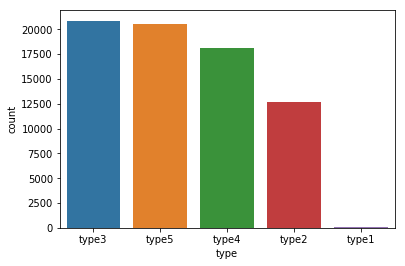

In [15]:
#cantidad de cada type
d_type = data.type 
ax = sns.countplot(d_type,label="Type")       
print (d_type.value_counts())

Hay 5 tipos en la variable type. Las incidencias de type 1 parecen ser mucho menores que el resto.

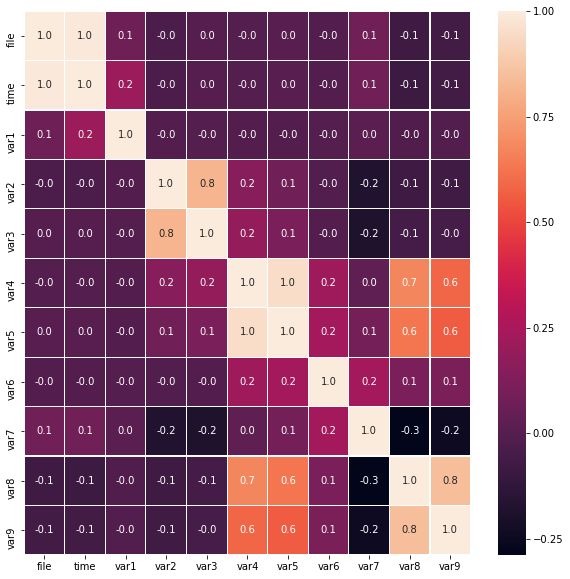

In [16]:
#correlación entre variables
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.1, fmt= '.1f',ax=ax)

Parece haber correlación directa entre varias variables (var2/var3, var4/var5, var4/var8...). Esto puede ser importante si quisiera hacer una clasificación de la variable type.

__Podría ser interesante analizar qué valores toman las distintas variables para cada categoría de type.__

In [17]:
#df para cada type
type1 = data[data['type'] == 'type1']
type2 = data[data['type'] == 'type2']
type3 = data[data['type'] == 'type3']
type4 = data[data['type'] == 'type4']
type5 = data[data['type'] == 'type5']
type1.head()

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9,type
75,1,13,234,14944,16976,31520,11728,32416,40947,48952,21824,type1
672,1,18,1802,24640,32944,38221,19763,32416,41280,52248,25280,type1
1174,1,22,3087,35424,45072,56131,42288,32432,37259,61875,36448,type1
1717,1,26,4606,41520,46208,63147,49587,32448,50731,64728,38800,type1
2886,1,36,7880,39904,44032,62832,53051,32448,53245,64752,48016,type1


In [19]:
type1.describe()

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.235294,352.852941,16418.284314,31453.490196,33257.411765,53903.362745,39231.568627,32431.215686,44900.872549,60677.843137,35362.196078
std,2.162582,201.407542,9535.797377,11467.853538,11444.881900,10673.524514,13213.433200,11.993915,7991.874909,5902.297594,7789.919348
min,1.000000,13.000000,112.000000,4320.000000,944.000000,18229.000000,3003.000000,32400.000000,30664.000000,45045.000000,13376.000000
25%,2.000000,163.500000,7102.250000,26660.000000,28696.000000,51018.750000,34884.250000,32416.000000,38335.000000,58819.500000,32212.000000
50%,4.000000,350.000000,17343.000000,31776.000000,34712.000000,56837.500000,42864.000000,32432.000000,44141.000000,63834.500000,38176.000000
75%,6.000000,548.000000,24823.000000,40688.000000,41140.000000,60763.750000,47230.250000,32432.000000,52917.750000,64756.500000,40732.000000
max,7.000000,636.000000,31896.000000,50528.000000,54688.000000,65424.000000,62173.000000,32448.000000,58675.000000,64792.000000,48016.000000


In [20]:
type2.describe()

,file,time,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000,12698.000000
mean,4.127579,338.889825,14968.576784,13442.769570,14428.078753,42935.866278,25553.047330,32407.284297,2824.705072,44181.975035,17746.565443
std,2.008082,182.818814,8739.338268,10127.035551,10478.159705,5226.601456,5581.339972,9.981158,2499.457827,4656.576972,4741.222852
min,1.000000,12.000000,1.000000,1600.000000,32.000000,24843.000000,4563.000000,32384.000000,0.000000,30251.000000,3536.000000
25%,2.000000,172.000000,7388.500000,5920.000000,6320.000000,39277.000000,21923.500000,32400.000000,1643.000000,41635.000000,15056.000000
50%,4.000000,365.000000,14904.000000,8768.000000,11680.000000,41989.000000,24616.000000,32400.000000,2277.000000,43531.000000,17088.000000
75%,6.000000,501.000000,22370.500000,18768.000000,20416.000000,45771.000000,28203.000000,32416.000000,3264.000000,45589.000000,19344.000000
max,7.000000,643.000000,32076.000000,54048.000000,54096.000000,65424.000000,60403.000000,32464.000000,50821.000000,64832.000000,57184.000000


__Con estas tablas es un poco dificil comparar los valores que toman las variables para cada categoría. Vamos a verlo gráficamente.__

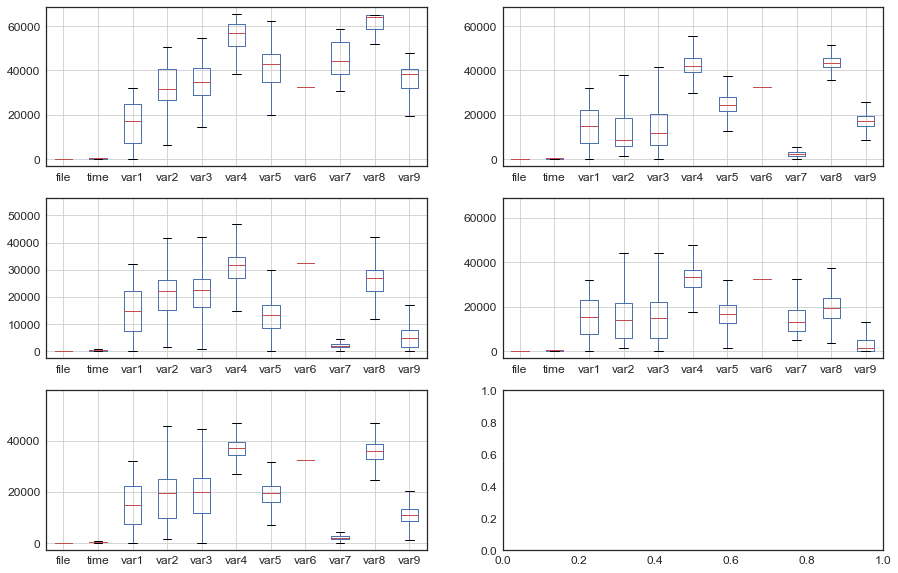

In [130]:
plt.figure(figsize=(18,20))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

type1.boxplot(ax=axes[0,0])
type2.boxplot(ax=axes[0,1])
type3.boxplot(ax=axes[1,0])
type4.boxplot(ax=axes[1,1])
type5.boxplot(ax=axes[2,0])

Con estos boxplots se puede empezar a ver que depende de para qué categoria, algunas variables toman unos valores distintos. Por ejemplo, var8 parece tener unos valores distinguibles en cada type. Algo parecia podría decirse de var7 o var4. Más adelante seria interesante ver mejor si estas variables serían adecuadas para clasificar una nueva observación en una de las categorías.

Por otro lado, como he mencionado antes la variable time podría ser alguno tipo de timestamp. En ese caso, se puede analizar la evolución de cada variable a lo largo del tiempo para ver si se desarrollan. Ya que la varible time se va repitiendo varias veces en cada valor, voy representar la media de cada variable var1, var2... a lo largo de time.

In [21]:
var1,var2,var3,var4,var5,var6,var7,var8,var9 = [],[],[],[],[],[],[],[],[]
for time in data.time.unique():
    data_temp = data[data['time'] == time]
    var1.append(data_temp['var1'].mean())
    var2.append(data_temp['var2'].mean())
    var3.append(data_temp['var3'].mean())
    var4.append(data_temp['var4'].mean())
    var5.append(data_temp['var5'].mean())
    var6.append(data_temp['var6'].mean())
    var7.append(data_temp['var7'].mean())
    var8.append(data_temp['var8'].mean())
    var9.append(data_temp['var9'].mean())
var1_9 = [var1,var2,var3,var4,var5,var6,var7,var8,var9]

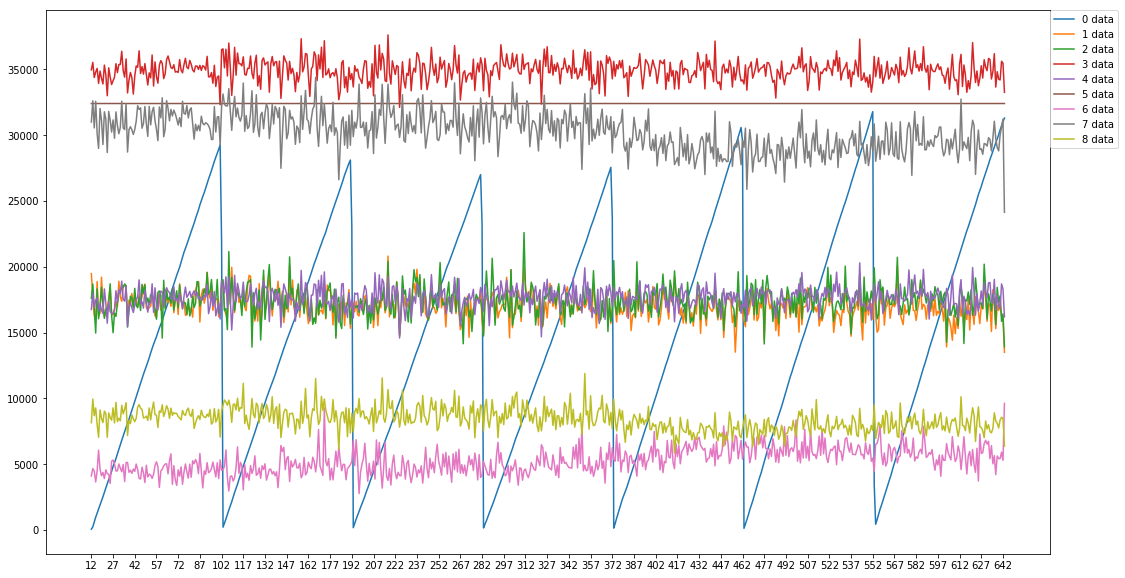

In [53]:
plt.figure(figsize=(18,10))
lines = []   
for i in range(len(var1_9)):
    lines += plt.plot(data.time.unique(),var1_9[i], label="{} data".format(i))

labels = [l.get_label() for l in lines]
plt.legend(lines, labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(min(data.time.unique()), max(data.time.unique())+1, 15))
plt.show()

Como ya había mencionado antes, el valor de var1 va incrementando a lo largo de cada archivo y se reinicia el empezar el siguiente. Esto se puede ver en la gráfica, ya que 102, 192... son los valores de time en los que acaban los archivos 1 y 2,
respectivamente. Para el resto de variables no parece haber ningun tipo de evolución temporal remarcable salvo fluctuaciones que se mantienen dentro de un rango constante.

# Selección de variables y clasificación

Con lo visto hasta ahora, me atrevería a decir que el objetivo de un dataset como este sería en de la clasificación de la variable type. Para ello, hemos visto que parece haber cierta correlación entre variables y que algunas podrían afectar más a type que otras. En este apartado voy a probar __varios métodos de selección de variables y a clasificar con random forest para testear.__

In [23]:
#Voy a eliminar las variables file, time y type de momento. Como var1 parece tener un comportamiento 
#distinto también lo voy a quitar
d_type = data.type 
drop_list = ['file','time','var1','type']
data_feat = data.drop(drop_list,axis = 1 )
data_feat.head()

,var2,var3,var4,var5,var6,var7,var8,var9
0,25344,27968,34677,14944,32400,2216,28237,5072
1,12960,22144,37275,20440,32400,1795,36755,14224
2,21424,23008,31725,11253,32384,1901,26640,0
3,7712,14528,28744,10219,32416,1248,35392,10704
4,30368,21440,28861,6101,32400,12989,23421,5920


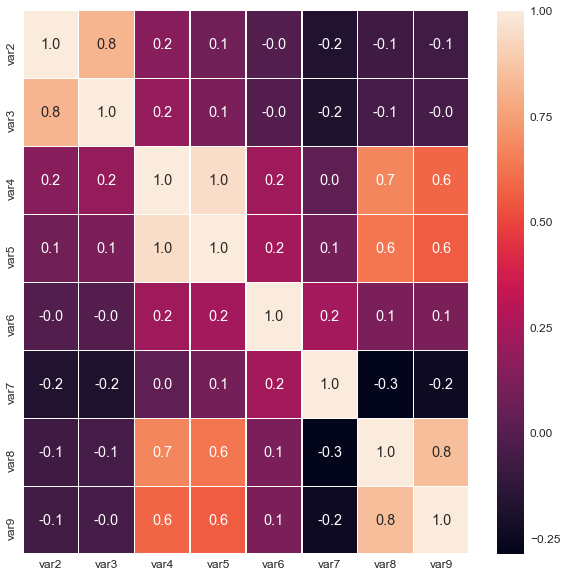

In [142]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_feat.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### Selección por correlación

Var4 y var5 están correladas así que voy a quitar var5 y a quedarme con var4. La razón es que var4 parece tomar valores más variados para cada type mientras que var5 se mantiene constante. Esto se puede ver en las visualizaciones de antes.


Exactitud:  0.911348661475


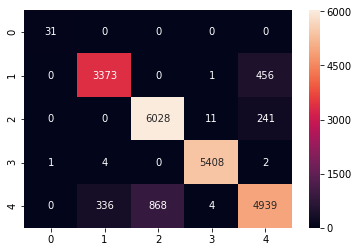

In [27]:
drop_list = ['file','time','var1','type', 'var5']
data_feat_4 = data.drop(drop_list,axis = 1 )
# hacemos un split 70/30 para train y test
x_train, x_test, y_train, y_test = train_test_split(data_feat_4, d_type, test_size=0.3, random_state=42)

#random forest
rf = RandomForestClassifier(random_state=43)      
rf = rf.fit(x_train,y_train)

ex = accuracy_score(y_test,rf.predict(x_test))
print('Exactitud: ',ex)
cm = confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Este método nos da una exactitud de predicción del __91,1%__. No es especialmente alta, vamos a ver si se puede mejorar por algún otro método.

### Univariate feature selection
Voy a utilizar un univariate feature selection para selecionar las mejores variables para clasificación y usarlas para entrenar el clasificador.

In [34]:
# hacemos un split 70/30 para train y test
x_train, x_test, y_train, y_test = train_test_split(data_feat, d_type, test_size=0.3, random_state=42)

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  2.35994893e+07   2.20592165e+07   3.05917139e+07   5.74529412e+07
   6.28289976e+00   2.81470104e+08   1.31739353e+08   1.75425872e+08]
Feature list: Index(['var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9'], dtype='object')


Las mejores variables parecen ser var7, var8, var9, var5 y var4. Por otro lado, las tres primeras dan un score un poco superior al resto. 

Exactitud:  0.914620098604


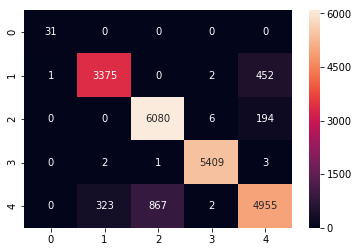

In [40]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

rf_2 = RandomForestClassifier()      
rf_2 = rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,rf_2.predict(x_test_2))
print('Exactitud: ',ac_2)
cm_2 = confusion_matrix(y_test,rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Este método nos da una exactitud de predicción del __91,4%__. Un poco mejor que el anterior.

### Recursive feature elimination
Vamos a probar con un recursive feature elimination para seleccionar las 3 mejores variables, ya que como acabamos de ver var7,var8 y var9 parecían dar mejores scores que el resto.

In [39]:
rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=rf_3, n_features_to_select=3, step=1)
rfe = rfe.fit(x_train, y_train)
print('Mejores 3 variables:',x_train.columns[rfe.support_])

Mejores 3 variables: Index(['var7', 'var8', 'var9'], dtype='object')


Parece que los resultados coinciden!

### Recursive feature elimination y cross validation
Como una última vuelta a la feature selection, vamos a probar a mejorar los resultados con cross validation. Con cross validation podemos obtener el número optimo de variables y cuales son.

In [44]:
rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Número de variables:', rfecv.n_features_)
print('Mejores variables:', x_train.columns[rfecv.support_])

Número de variables: 5
Mejores variables: Index(['var4', 'var5', 'var7', 'var8', 'var9'], dtype='object')


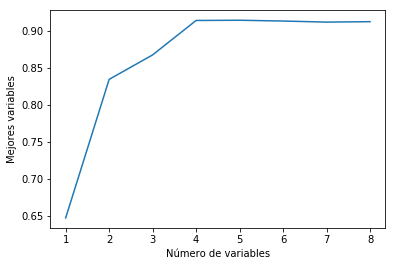

In [46]:
plt.figure()
plt.xlabel("Número de variables")
plt.ylabel("Mejores variables")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Aunque habíamos visto que var4 y var5 teníen un score inferior, parece que la forma optima de clasificar los type se consigue con las 5 variables.

# PCA
Finalmente, voy a usar un PCA para obtener una representación con dimensiones reducidas para ver cuántas serían suficientes para representar este dataset.

Text(0,0.5,'Variación explicada')

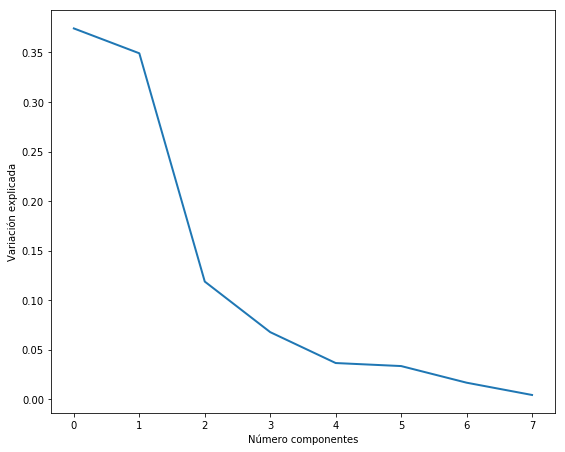

In [52]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(data_feat, d_type, test_size=0.3, random_state=42)

#estandarizacion
x_train_std = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_std = (x_test-x_test.mean())/(x_test.max()-x_test.min())

pca = PCA()
pca.fit(x_train_std)

plt.figure(1, figsize=(10, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Número componentes')
plt.ylabel('Variación explicada')

La recucción de dimensiones no es demasiado grande. Con 4 dimensiones podemos explicar un 95% de la variación lo que es similar a lo que hemos visto hasta ahora.

# Resumen y conclusión

Se me hace un poco complicado decidir un camino por el que analizar los datos para "contar una historia" como me habéis comentado sin un contexto de qué datos son y para qué sería interesante usarlos. Aun así, he intentado sacar una vista general de lo que hay en el dataset y qué puede representar, aunque estoy seguro de que se me habrán pasado detalles que podrían ser interesantes. Por otro lado, aun sin tener seguro que sean timeseries, he querido probar a hacer un poco de feature selection y clasificación, ya que por el tipo de dataset parecía que el objetivo era ese. Sin más, espero que esto os haya dado una idea de cómo suelo enfocar este tipo de problemas con un dataset nuevo.

# Voy a hacer cambios aqui


In [ ]:
# mas c